# t-fordeling

$t$-fordelingen er en ekstremt spesialisert fordeling. I dette emnet dukker behovet for $t$-fordeling opp når vi har observasjoner som kan antas *normalfordelte*, men med både ukjent forventningsverdi $\mu$ og ukjent standardavvik $\sigma$. Hvis vi vil estimere forventningsverdien $\mu$ fra et tilfeldig utvalg og si noe om usikkerheten i estimatet vårt ved hjelp av et konfidensintervall, så trenger vi $t$-fordelingen. Det samme gjelder om vi ønsker å gjøre en hypotesetest om $\mu$, eller inferens på regresjonslinja i lineær regresjon. 

$t$-fordelingen ligner på normalfordeling, men den har tykkere haler. Jo færre målinger vi har gjort, jo større forskjell er det på de to fordelingene. $t$-fordelingen er derfor uhyre viktig i situasjoner der det er dyrt, vanskelig eller bare ekstremt tidskrevende å gjøre mange målinger. 

$t$-fordelingen beskrives av en parameter $\nu$, som ofte kalles antall frihetsgrader. Når vi starter med et utvalg av normalfordelte størrelser har vi egne regneregler for å komme frem til parameterverdien $\nu$.

In [1]:
from scipy import stats # statistikk-modulen i scipy-pakken
import matplotlib.pyplot as plt # plotting
import numpy as np

## Sannsynlighetstetthet $f(x)$

For $t$-fordelingen har funksjonen $f(x)$ en lignende klokkeform ("bell curve") som normalfordelingen. Kurven er symmetrisk, sentrert rundt $x = 0$, der den også har et toppunkt.

Text(0.5, 0, 'x')

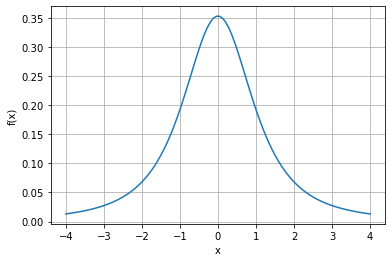

In [10]:
nu = 2 # parameterverdi i t-fordeling

xval = np.linspace(- 4,+ 4, 100)  # x-verdier
fx = stats.t.pdf(xval, nu)     # f(x)
plt.plot(xval, fx)
plt.grid(); plt.ylabel("f(x)"); plt.xlabel("x")

## Kumulative sannsynligheter

In [13]:
nu = 2
x = 2
stats.t.cdf(x,nu)  # P(X ≤ x)

0.908248290463863

In [14]:
# Sammenligne med standard normalfordeling
stats.norm.cdf(x,0,1,)  # P(Z ≤ x)

0.9772498680518208

## Kritiske verdier i t-fordelingen

En kritisk verdi er et punkt $x_{\alpha}$ på tallinja slik at $P(X > x) = \alpha$ for en gitt sannsynlighet $\alpha$. Dersom $X \sim t(\nu)$, hvilket tall på tallinja, $x_{0.1}$ oppfyller $P(X > x_{0.1}) = 0.1$? Kritiske verdier i $t$-fordelingen er det vi har mest bruk for når det gjelder denne spesialfordelingen. 

Husk at den kritiske verdien i $t$-fordelingen avhenger av den hale-sannsynligheten vi er ute etter ($\alpha = 0.1$ i dette eksempelet), og parametervedien i $t$-fordelingen. 

In [20]:
nu = 5
alpha = 0.1
stats.t.ppf(1-alpha,nu) # OBS: 1-alpha fordi pythons ppf-funksjon regner på venstre hale

1.4758840487820273

Text(0.5, 0, 'x')

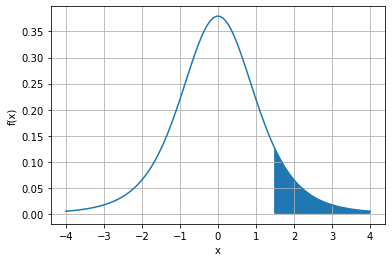

In [21]:
# Plotter kritisk verdi og areal i høyre hale 
xval = np.linspace(-4, 4, 100)  # x-verdier
fx = stats.t.pdf(xval, nu)       # f(x)
x_alpha = stats.t.ppf(1 - alpha,nu)

section = np.linspace(x_alpha,4, 100, 100) # alle x-verdier fra x_alpha og oppover

plt.plot(xval, fx)
plt.fill_between(section,stats.t.pdf(section, nu))
plt.grid(); plt.ylabel("f(x)"); plt.xlabel("x")